## Проект e-commerce
Продакт-менеджер попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз?   

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?   
3. По каждому товару определить, в какой день недели товар чаще всего покупается.

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

6. Часто для качественного анализа аудитории используются подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

## 1.EDA

In [1]:
# Импортирую библиотеки

import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

1.1 Загружаем датафрейм с информацией про пользователей, смотрим структуру данных, размер таблицы, проверяем тип данных, пропущенные значения. Типы данных распознаны корректно, пропущенных значений нет.

In [2]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-kozyrkova/lesson_1_Python/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.shape

(99441, 5)

In [4]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

1.2 Загружаем датафрейм с информацией про заказы, смотрим структуру данных, размер таблицы, проверяем тип данных.  Меняем тип данных колонок, в которых содержатся дата и время, в формат datetime. Смотрим наличие пропущенных значений.

In [6]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-kozyrkova/lesson_1_Python/olist_orders_dataset.csv')

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders.shape

(99441, 8)

In [9]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [10]:
orders[['order_purchase_timestamp', 
        'order_approved_at', 
        'order_delivered_carrier_date', 
        'order_delivered_customer_date',
        'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 
                                                    'order_approved_at', 
                                                    'order_delivered_carrier_date', 
                                                    'order_delivered_customer_date',
                                                    'order_estimated_delivery_date']].apply(pd.to_datetime)

In [11]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

В датафрейме есть пропущенные значения в столбцах времени подтверждения оплаты заказа, передачи в логистическую службу  и доставки заказа.

In [12]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Проверим пропущенные значения при условии выбора заказов, у которых нет времени подтверждения оплаты заказа.

In [13]:
orders.query('order_approved_at.isna() == True').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date     146
order_delivered_customer_date    146
order_estimated_delivery_date      0
dtype: int64

Мы видим, что есть строки (160-146 = 14), по которым нет времени подтверждения оплаты, но есть дата доставки. Будем считать, что заказ был все-таки доставлен покупателю, а оплата произошла после вручения или данные об оплате не были внесены.

Проверим пропущенные значения при условии выбора заказов, у которых нет времени передачи в логистическую службу.

In [14]:
orders.query('order_delivered_carrier_date.isna() == True').isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1783
order_delivered_customer_date    1782
order_estimated_delivery_date       0
dtype: int64

Мы видим, что есть 1 заказ (=1783-1782 = 1), у которого нет времени передачи в логистическую службу, но есть время доставки покупателю. Будем считать, что товар доставлен, но данные о передаче его в логистическую службу не были внесены.  

Проверим пропущенные значения при условии выбора заказов, у которых нет времени доставки покупателю.

In [15]:
orders.query('order_delivered_customer_date.isna() == True').isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1782
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Мы видим, что у части заказов, у которых нет времени доставки, нет и времени оплаты и передачи в логистическую службу, а у части заказов нет только времени доставки, то есть они на момент выгрузки таблицы находились в процессе доставки.  

Проверим логику формирования позаказного id клиента (customer_id): действительно ли каждому customer_id соответствует свой order_id (т.е. на один customer_id не приходится несколько order_id). Сгруппируем данные по customer_id и посчитаем кол-во заказов, которые приходятся на каждый customer_id. Отберем только те строки, в которых кол-во заказов больше 1. 

In [16]:
orders.groupby('customer_id', as_index = False) \
      .agg({'order_id':'count'}) \
      .query('order_id > 1') \
      .shape[0]

0

Таких строк нет, следовательно на каждый заказ (order_id) формируется позаказный id клиента (customer_id). Таким образом, количество customer_id у одного клиента (customer_unique_id) будет равняться его количеству заказов (покупок).

1.3 Загружаем датафрейм с информацией про позиции в заказе, смотрим структуру данных, размер таблицы, проверяем тип данных.  
Меняем тип данных колонок, в которых содержатся дата и время, в формат datetime. Смотрим наличие пропущенных значений.

In [17]:
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-kozyrkova/lesson_1_Python/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
order_items.shape

(112650, 7)

In [19]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [20]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items.shipping_limit_date)

In [21]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [22]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Дополнительно проанализируем принцип формирования данного датасета.  
Найдем заказ с наибольшим количеством позиций.

In [23]:
order_items.groupby('order_id', as_index = False) \
           .agg({'product_id' : 'count'}) \
           .sort_values('product_id', ascending = False)\
           .head(1)

,order_id,product_id
50137,8272b63d03f5f79c56e9e4120aec44ef,21


Посмотрим на состав заказа с наибольшим количеством позиций и увидим, что каждая единица товара, даже если товар был куплен  несколько раз, указывается в отдельной строке (т.е. нет столбца с указанием кол-ва товаров).

In [24]:
order_items.query('order_id == "8272b63d03f5f79c56e9e4120aec44ef"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


## 2. Сколько у нас пользователей, которые совершили покупку только один раз?

2.1 Посмотрим, какие статусы заказов есть в датафрейме orders.

In [25]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

2.2 Будем считать покупкой тот заказ, который был оплачен и доставлен покупателю (т.е. отбираем заказы со статусом delivered, по которым есть время подтверждения оплаты заказа (order_approved_at)). Оплаченные, но недоставленные заказы мы не учитываем, так как при получении покупатель может отменить заказ и вернуть товар и деньги.

In [26]:
purchases = orders.query('(order_status == "delivered") & (order_approved_at.isna() == False)')
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


2.3 Объединяем отобранные заказы с таблицей с customer_unique_id через customer_id. Используем inner join, так как нам нужны только customer_unique_id по отобранным заказам.

In [27]:
customers_with_purchases = customers[['customer_unique_id', 'customer_id']].merge(purchases, on = 'customer_id')
customers_with_purchases.head()

,customer_unique_id,customer_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


2.4 Cгруппируем датафрейм по customer_unique_id, посчитаем кол-во заказов для каждого customer_unique_id и отберем только те строки, в которых кол-во заказов равно 1 (т.е. клиент совершил одну покупку). Затем посчитаем количество таких строк. 

In [28]:
customers_with_purchases.groupby('customer_unique_id', as_index = False) \
                        .agg({'order_id' : 'count'}) \
                        .rename(columns = {'order_id':'number_orders'}) \
                        .query('number_orders == 1') \
                        .shape[0]

90545

Таким образом, 90545 пользователей совершили только одну покупку.

## 3. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

3.1 Недоставленный товар - тот, у которого есть пропущенное значение в столбце order_delivered_customer_date. Посмотрим, для каких статусов заказов есть отсутствующие значения в данном столбце.

In [29]:
orders.query('order_delivered_customer_date.isna() == True') \
      .order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

Таким образом, причинами отсутствия времени о доставке может быть следующее:  
- заказы находятся на этапах обработки до доставки до пользователя (на этапе выставления счета, оплаты, транспортировки и тд);
- отмененные (canceled) и недоступные (unavailable) заказы;
- ошибки в информации о заказах (например, указан статус delivered, но не указано время доставки).  

Будем разбираться с реальными причинами недоставки заказов, т.е. учитывать последние 2 причины.

3.2 Извлечем дату совершения заказа, приведенную к началу месяца, для дальнейшей группировки.

In [30]:
orders['order_date'] = orders.order_purchase_timestamp.astype('datetime64[M]')

3.3 Проанализируем отмененные и недоступные заказы.  
По некоторым отмененным заказам есть информация о времени доставки, т.е. заказ был доставлен и потом отменен.

In [31]:
orders.query('order_status in ["canceled", "unavailable"] & order_delivered_customer_date.isna() == False')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,2018-02-01
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,2016-10-01
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,2016-10-01
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,2016-10-01
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,2016-10-01
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,2016-10-01


Будем исследовать только те заказы, которые были отменены/недоступны и не были доставлены до покупателя.  

In [32]:
# Сгруппируем данные помесячно и по статусу заказа и посчитаем кол-во отмененных и недоступных заказов для каждого месяца, 
# затем используем метод pivot для наглядного отображения и заменим недостающие значения нулями

cancel_and_unavailable = \
       orders.query('order_status in ["canceled", "unavailable"] & order_delivered_customer_date.isna() == True')\
      .groupby(['order_date', 'order_status'], as_index = False) \
      .agg({'order_id' : 'count'}) \
      .rename(columns = {'order_id' : 'number_orders'}) \
      .pivot(index = 'order_date', columns = 'order_status', values = 'number_orders') \
      .fillna(0)

cancel_and_unavailable.head()

order_status,canceled,unavailable
order_date,,
2016-09-01,2.0,0.0
2016-10-01,19.0,7.0
2017-01-01,3.0,10.0
2017-02-01,17.0,45.0
2017-03-01,33.0,32.0


In [33]:
# Посчитаем среднемесячное значение для отмененных и недоступных заказов

cancel_and_unavailable.agg({'canceled' : 'mean', 'unavailable' : 'mean'}).round(2)

canceled       25.79
unavailable    25.38
dtype: float64

3.4 Проанализируем ошибки в датах доставки заказов

In [34]:
# Отберем заказы, по которым указан статус delivered, но нет даты доставки, сгруппируем данные помесячно и определим 
# среднемесячное кол-во заказов, по которым указаны ошибочные данные

orders.query('order_status == "delivered" & order_delivered_customer_date.isna() == True') \
      .groupby('order_date', as_index = False) \
      .agg({'order_id' : 'count'}) \
      .order_id.mean().round(2)

2.0

Таким образом: 
- 25.79 заказов в месяце не доставляется по причине отмены заказа,
- 25.38 - по причине недоступности товаров в заказе,
- 2.00 - связаны с ошибками в данных.

## 4. По каждому товару определить, в какой день недели товар чаще всего покупается.

4.1 Будем считать покупкой тот заказ, который был оплачен и доставлен покупателю (см. п.2 выше).  
Будем считать датой покупки дату совершения заказа (order_purchase_timestamp).  
Отобранные покупки (96 464 шт.) у нас содержаться в датафрейме purchases (см. п.2 выше).  

In [35]:
purchases.shape[0]

96464

4.2 Для того, чтобы определить, в какой день недели товар чаще всего покупается, необходимо объединить столбцы из таблицы purchases и столбцы из таблицы order_items.  
Сделаем объединение через left join (левая таблица - отобранные покупки, к которым нужно присоединить product_id).

In [36]:
product_purchase_time = purchases[['order_id', 'order_purchase_timestamp']] \
                        .merge(order_items[['product_id', 'order_id']], on = 'order_id', how = 'left')
product_purchase_time.head()

,order_id,order_purchase_timestamp,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e


Посчитаем кол-во уникальных покупок в объединенной таблице. Их столько же, сколько в таблице purchases, значит все ок.

In [37]:
product_purchase_time.order_id.nunique()

96464

Проверим, есть ли отсутствующие значения в таблице. Таких значений нет.

In [38]:
product_purchase_time.isna().sum()

order_id                    0
order_purchase_timestamp    0
product_id                  0
dtype: int64

4.3 Добавим новый столбец с названием дня недели, в который была совершена покупка (выделим его из столбца order_purchase_timestamp).

In [39]:
product_purchase_time['order_purchase_day'] = product_purchase_time.order_purchase_timestamp.dt.day_name()
product_purchase_time.head()

,order_id,order_purchase_timestamp,product_id,order_purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


4.4 Сгруппируем данные по product_id и найдем для каждого товара наиболее часто встречающийся день недели, когда этот товар был куплен (т.е. моду). Если таких дней недели несколько, в строке будет отражено несколько значений.  
 Итоговая таблица готова.

In [40]:
product_favorite_day = product_purchase_time.groupby('product_id', as_index = False) \
                                            .agg({'order_purchase_day' : pd.Series.mode})

product_favorite_day.head()

,product_id,order_purchase_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


## 5. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

5.1 Будем считать покупкой тот заказ, который был оплачен и доставлен покупателю.  
Отобранные покупки у нас содержатся в датафрейме purchases (см. п.2 выше).

In [41]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


5.2 Объединим таблицы customers и purchases с необходимыми нам столбцами по столбцу 'customer_id'.
Нам необходимы полные данные о customer_unique_id и времени покупки (order_purchase_timestamp) для каждого покупателя, поэтому объединяем таблицы через inner join.  
За кол-во заказов (покупок) у одного покупателя отвечает кол-во customer_id у одного customer_unique_id (см. п.1.2 выше).

In [42]:
purchase_dates = customers[['customer_id', 'customer_unique_id']] \
                .merge(purchases[['customer_id', 'order_purchase_timestamp']], on = 'customer_id')

purchase_dates.head()

,customer_id,customer_unique_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30


In [43]:
# Проверим пропущенные значения в объединенной таблице

purchase_dates.isna().sum()

customer_id                 0
customer_unique_id          0
order_purchase_timestamp    0
dtype: int64

In [44]:
# Добавим в отдельный столбец дату, приведенную к началу месяца, по каждому заказу

purchase_dates['order_month'] = purchase_dates.order_purchase_timestamp.astype('datetime64[M]')

5.3 Проанализируем период, за который у нас есть данные.

In [45]:
# Определим самую раннюю и самую позднюю даты покупки в полученной таблице
# Данные за сентябрь 2016 и август 2018 неполные, для корректного расчета удалим их из результирующей таблицы 

purchase_dates.order_purchase_timestamp.min()

Timestamp('2016-09-15 12:16:38')

In [46]:
purchase_dates.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

In [47]:
# Рассчитаем min и max даты, приведенные к началу месяца, которые будут выступать границами для нашего запроса 

data_min = purchase_dates.order_purchase_timestamp.astype('datetime64[M]').min()
data_max = purchase_dates.order_purchase_timestamp.astype('datetime64[M]').max()

In [48]:
# Отберем строки, удовлетворяющие запросу по датам, т.е. оставим в датафрейме только полные месяцы 
# (данные за сентябрь 2016 и август 2018 неполные)

purchase_dates = purchase_dates.query('order_month > @data_min & order_month < @data_max')
purchase_dates.head()

,customer_id,customer_unique_id,order_purchase_timestamp,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05-01
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-05-01
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03-01
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-07-01


5.4 Выделим из даты покупки кол-во дней в месяце и отдельно посчитаем кол-во недель в месяце (= кол-во дней в месяце / 7) для всех месяцев.

In [49]:
purchase_dates['weeks_in_month'] = purchase_dates.order_purchase_timestamp.dt.days_in_month / 7
purchase_dates.head()

,customer_id,customer_unique_id,order_purchase_timestamp,order_month,weeks_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05-01,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01-01,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-05-01,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03-01,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-07-01,4.428571


5.5 Группируем строки по дате, customer_unique_id и кол-ву недель в месяце (оно будет одинаковым внутри одного месяца), считаем кол-во покупок в месяц (purchases) и кол-во покупок в неделю (purchases_in_week = purchases / weeks_in_month).

In [50]:
purchases_in_week = purchase_dates.groupby(['order_month', 'customer_unique_id', 'weeks_in_month'], as_index = False) \
                .agg({'customer_id' : 'count'}) \
                .rename(columns = {'customer_id' : 'purchases'})

purchases_in_week['purchases_in_week'] = purchases_in_week.purchases / purchases_in_week.weeks_in_month

purchases_in_week.head()

,order_month,customer_unique_id,weeks_in_month,purchases,purchases_in_week
0,2016-10-01,0032c76b20340da25249092a268ce66c,4.428571,1,0.225806
1,2016-10-01,01f156677184504063bd19739f924af1,4.428571,1,0.225806
2,2016-10-01,0636d30c77f0f9cfad81f1c9b58c791f,4.428571,1,0.225806
3,2016-10-01,06bdfbbe1857c3c925ec81abfb1c9666,4.428571,1,0.225806
4,2016-10-01,0829f7df6577d5a4b65439bea701405f,4.428571,1,0.225806


5.6 Группируем данные по customer_unique_id и считаем среднее число покупок в неделю по каждому пользователю.  
Результирующая таблица готова.

In [51]:
customer_week = purchases_in_week.groupby('customer_unique_id', as_index = False)\
                                 .agg({'purchases_in_week' : 'mean'}).round(2)
customer_week.head()

,customer_unique_id,purchases_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.23
2,0000f46a3911fa3c0805444483337064,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,0.23
4,0004aac84e0df4da2b147fca70cf8255,0.23


Посмотрим на распределение кол-ва покупок в неделю.   
Основная часть покупателей делает около 0,2-0,3 покупок в неделю.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


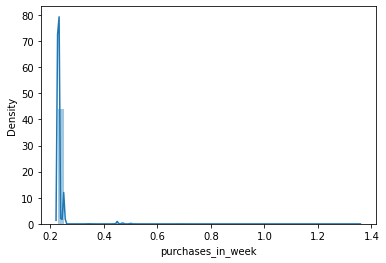

In [52]:
sns.distplot(customer_week.purchases_in_week)

# 6. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Опишем основные характеристики:

- признак когорты: совершение покупки  
- размер когорты: месяц  
- отчетный период: сентябрь 2016 - август 2018  
- анализируемый показатель: retention rate (RR)  

6.1 Покупки (т.е. заказы, оплаченные и доставленные покупателю) у нас содержаться в датафрейме purchases.  
Объединяем таблицы purchases и customers так, чтобы в объединенной таблице оказались customer_unique_id и order_purchase_timestamp (время совершения заказа).

In [53]:
customer_info = customers[['customer_id', 'customer_unique_id']] \
                .merge(purchases[['customer_id', 'order_purchase_timestamp']], on = 'customer_id')

customer_info.head()

,customer_id,customer_unique_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30


In [54]:
# Проверяем пропущенные значения

customer_info.isna().sum()

customer_id                 0
customer_unique_id          0
order_purchase_timestamp    0
dtype: int64

In [55]:
# Выделяем из времени совершения заказа дату (месяц и год)

customer_info['month'] = customer_info.order_purchase_timestamp.dt.to_period('M')  
customer_info.head()

,customer_id,customer_unique_id,order_purchase_timestamp,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-07


6.2 Для каждого customer_unique_id находим месяц, в котором произошла его первая покупка.

In [56]:
cohort_first = customer_info.groupby('customer_unique_id', as_index = False) \
                       .agg({'month' : 'min'}) \
                       .rename(columns = {'month' : 'first_purchase_month'})

cohort_first.head()

,customer_unique_id,first_purchase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


6.3 Объединяем таблицы по customer_unique_id. Таким образом, в таблице есть месяц покупки и первый месяц покупки этого покупателя.

In [57]:
customer_cohort = customer_info.merge(cohort_first, on = 'customer_unique_id')
customer_cohort.head()

,customer_id,customer_unique_id,order_purchase_timestamp,month,first_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,2018-07,2018-07


In [58]:
# Проверяем равенство числа строк в исходной таблице с покупками и в объединенной таблице. Число строк совпадает, все ок

purchases.shape[0] == customer_cohort.shape[0]

True

Группируем датафрейм по месяцу покупки и первому месяцу покупки покупателей и считаем кол-во уникальных покупателей.

In [59]:
cohort = customer_cohort.groupby(['month', 'first_purchase_month'], as_index = False) \
                        .agg({'customer_unique_id' : 'nunique'}) \
                        .rename(columns = {'customer_unique_id' : 'number_customers'})
cohort.head()

,month,first_purchase_month,number_customers
0,2016-09,2016-09,1
1,2016-10,2016-10,262
2,2016-12,2016-12,1
3,2017-01,2016-12,1
4,2017-01,2017-01,715


Считаем разницу между месяцем покупки и первым месяцем покупки для формирования когорт и получаем порядковый номер месяца покупки относительно первого месяца покупки.

In [60]:
cohort['cohort'] = cohort.month.astype('int') - cohort.first_purchase_month.astype('int')
cohort.head()

,month,first_purchase_month,number_customers,cohort
0,2016-09,2016-09,1,0
1,2016-10,2016-10,262,0
2,2016-12,2016-12,1,0
3,2017-01,2016-12,1,1
4,2017-01,2017-01,715,0


6.4 Делаем сводную таблицу с помощью метода pivot, где строки - первый месяц покупки, столбцы - порядковый номер месяца относительно первого месяца покупки, значения - число уникальных покупателей.

In [61]:
cohort_pivot = cohort.pivot(index = 'first_purchase_month', columns = 'cohort', values = 'number_customers')
cohort_pivot 

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase_month,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,715.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1616.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,NaN
2017-04,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN


6.5 Считаем retention rate: делим каждый столбец на число покупателей в первом месяце покупки (значение в нулевом столбце) и умножаем на 100 (чтобы получить проценты).

In [62]:
cohort_pivot[cohort_pivot.columns[0:20]] = cohort_pivot[cohort_pivot.columns[0:20]] \
                                            .div(cohort_pivot[cohort_pivot.columns[0]], axis = 0).mul(100).round(2)
cohort_pivot

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase_month,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,0.38,NaN,NaN,0.38,NaN,0.38,NaN,0.38,NaN,0.38,NaN,0.38,0.76,0.76
2016-12,100.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.28,0.28,0.14,0.42,0.14,0.42,0.14,0.14,NaN,0.42,0.14,0.70,0.42,0.14,0.14,0.28,0.42,0.14,NaN
2017-02,100.0,0.19,0.31,0.12,0.43,0.12,0.25,0.19,0.06,0.19,0.12,0.31,0.12,0.19,0.12,0.06,0.06,0.19,NaN,NaN
2017-03,100.0,0.44,0.36,0.40,0.36,0.16,0.16,0.32,0.32,0.08,0.36,0.12,0.20,0.12,0.16,0.24,0.08,0.12,NaN,NaN
2017-04,100.0,0.62,0.22,0.18,0.27,0.27,0.35,0.31,0.31,0.18,0.27,0.09,0.04,0.04,0.09,0.09,0.13,NaN,NaN,NaN
2017-05,100.0,0.46,0.46,0.29,0.29,0.32,0.41,0.14,0.26,0.26,0.26,0.35,0.23,0.03,0.17,0.20,NaN,NaN,NaN,NaN
2017-06,100.0,0.49,0.40,0.43,0.30,0.40,0.36,0.23,0.13,0.20,0.30,0.36,0.16,0.16,0.23,NaN,NaN,NaN,NaN,NaN


6.5 В задании необходимо проанализировать когорты с января по декабрь. Такая информация у нас есть только за 2017 год.  
Отберем только строки с января по декабрь 2017.

In [63]:
rr_2017 = cohort_pivot.query('first_purchase_month >= "2017-01" & first_purchase_month <= "2017-12"')
rr_2017

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase_month,,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.28,0.28,0.14,0.42,0.14,0.42,0.14,0.14,NaN,0.42,0.14,0.70,0.42,0.14,0.14,0.28,0.42,0.14,NaN
2017-02,100.0,0.19,0.31,0.12,0.43,0.12,0.25,0.19,0.06,0.19,0.12,0.31,0.12,0.19,0.12,0.06,0.06,0.19,NaN,NaN
2017-03,100.0,0.44,0.36,0.40,0.36,0.16,0.16,0.32,0.32,0.08,0.36,0.12,0.20,0.12,0.16,0.24,0.08,0.12,NaN,NaN
2017-04,100.0,0.62,0.22,0.18,0.27,0.27,0.35,0.31,0.31,0.18,0.27,0.09,0.04,0.04,0.09,0.09,0.13,NaN,NaN,NaN
2017-05,100.0,0.46,0.46,0.29,0.29,0.32,0.41,0.14,0.26,0.26,0.26,0.35,0.23,0.03,0.17,0.20,NaN,NaN,NaN,NaN
2017-06,100.0,0.49,0.40,0.43,0.30,0.40,0.36,0.23,0.13,0.20,0.30,0.36,0.16,0.16,0.23,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,0.53,0.35,0.24,0.29,0.21,0.32,0.11,0.19,0.27,0.21,0.29,0.13,0.24,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.69,0.35,0.27,0.35,0.52,0.30,0.27,0.15,0.15,0.25,0.20,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.70,0.55,0.27,0.45,0.22,0.22,0.25,0.27,0.17,0.25,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим heatmap для retention rate когорт с января по декабрь 2017.

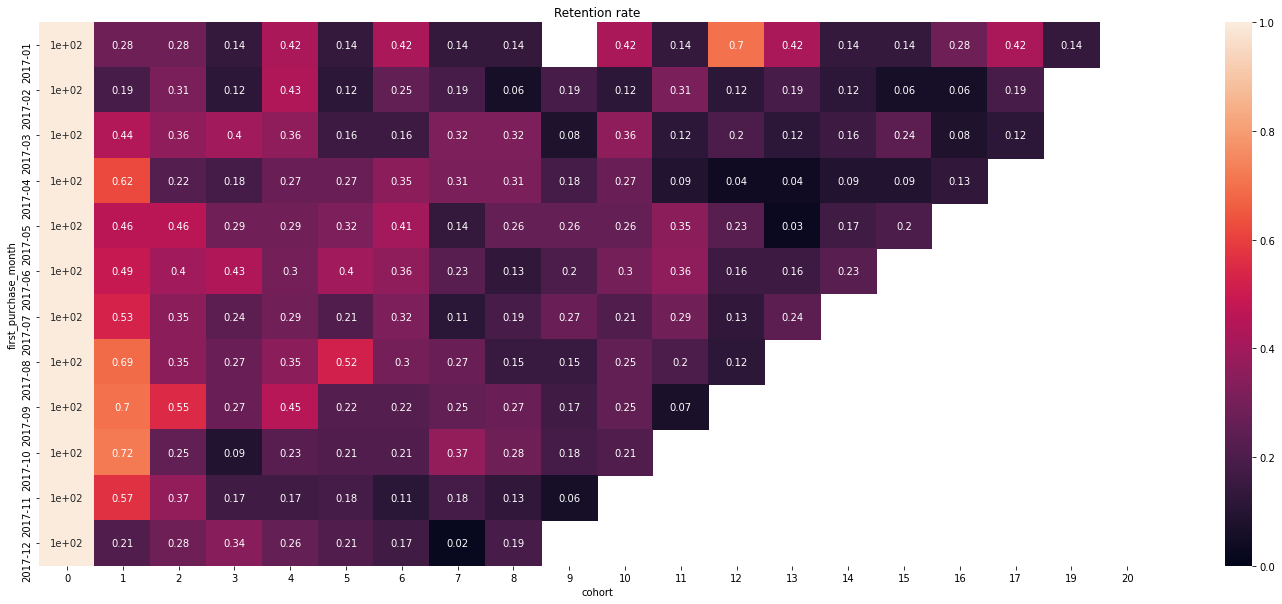

In [64]:
plt.figure(figsize=(25,10))
plt.title('Retention rate')
sns.heatmap(data = rr_2017, annot=True, vmin=0, vmax=1)

Найдем когорту среди 2017 г. с наибольшим значением retention rate на 3й месяц. Это июнь 2017.

In [65]:
rr_2017[rr_2017[3] == rr_2017[3].max()].index

PeriodIndex(['2017-06'], dtype='period[M]', name='first_purchase_month', freq='M')

## 7. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

7.1 Покупки (= оплаченные и доставленные запасы) у нас содержаться в датафрейме purchases.

In [66]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [67]:
# Посмотрим, за какой период времени у нас представлены данные

purchases.order_purchase_timestamp.min()

Timestamp('2016-09-15 12:16:38')

In [68]:
purchases.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

В качестве текущей даты (now) будем использовать дату, следующую после последней покупки (30.08.2018).

In [69]:
now = purchases.order_purchase_timestamp.dt.date.max() + timedelta(days=1)
now

datetime.date(2018, 8, 30)

Объединим необходимые столбцы из таблиц customers и purchases.

In [70]:
purchase_inf = customers[['customer_id', 'customer_unique_id']] \
                .merge(purchases[['customer_id', 'order_id', 'order_purchase_timestamp']], on = 'customer_id')
purchase_inf.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30


In [71]:
# Выделим из времени совершения заказа дату в отдельный столбец

purchase_inf['date'] = purchase_inf.order_purchase_timestamp.dt.date
purchase_inf.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-19
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29


Подготовим таблицу с monetary. Найдем сумму каждого заказа в таблице order_items.

In [72]:
order_monetary = order_items.groupby('order_id', as_index = False) \
                           .agg({'price' : 'sum'}) \
                           .rename(columns = {'price' : 'monetary'})
order_monetary

,order_id,monetary
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


Объединим таблицы purchase_inf и order_monetary. Исходная таблица готова.

In [73]:
purchase_rfm = purchase_inf[['customer_unique_id', 'order_id', 'date' ]].merge(order_monetary, on = 'order_id')
purchase_rfm

,customer_unique_id,order_id,date,monetary
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,230.00
...,...,...,...,...
96459,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07,74.90
96460,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04,114.90
96461,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08,37.00
96462,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03,689.00


7.2 Cгруппируем таблицу по customer_unique_id и найдем дату последней покупки для каждого пользователя, а также посчитаем кол-во и сумму заказов для каждого пользователя.

In [74]:
rfm = purchase_rfm \
                                  .groupby('customer_unique_id', as_index = False) \
                                  .agg({'date' : 'max', 'order_id' : 'count', 'monetary' : 'sum'}) \
                                  .rename(columns = {'date' : 'last_order_date', 'order_id' : 'frequency'})

rfm.head()

,customer_unique_id,last_order_date,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00


Добавим новый столбец, в котором посчитаем recency - кол-во дней с момента последней покупки до текущей даты (до 30.08.2018)

In [75]:
rfm['recency'] = (now - rfm.last_order_date).dt.days
rfm.head()

,customer_unique_id,last_order_date,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,115
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,538
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,322
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,289


Поменяем порядок столбцов и уберем лишние столбцы. Результирующая таблица для присвоения рангов готова.

In [76]:
rfm = rfm.reindex(columns=['customer_unique_id', 'recency', 'frequency', 'monetary'])
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,538,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00


7.3 Исследуем полученные значения recency, frequency и monetary.

In [77]:
rfm.dtypes

customer_unique_id     object
recency                 int64
frequency               int64
monetary              float64
dtype: object

In [78]:
# Проверим отсутствие пропущенных значений 

rfm.isna().sum()

customer_unique_id    0
recency               0
frequency             0
monetary              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f785bf57860>,
      dtype=object)

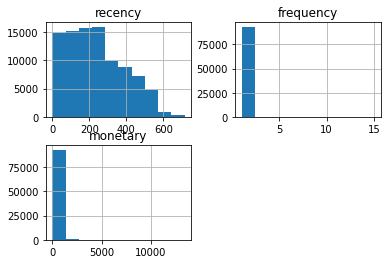

In [79]:
# Посмотрим распределение показателей на графике

rfm[['recency', 'frequency', 'monetary']].hist()

In [80]:
# Посмотрим на распределение показателей на цифрах

rfm[['recency', 'frequency', 'monetary']].describe()

,recency,frequency,monetary
count,93345.000000,93345.000000,93345.000000
mean,238.433703,1.033414,141.623308
std,152.557603,0.209088,215.705007
min,1.000000,1.000000,0.850000
25%,115.000000,1.000000,47.650000
50%,219.000000,1.000000,89.760000
75%,347.000000,1.000000,154.750000
max,714.000000,15.000000,13440.000000


In [81]:
# Посмотрим на значения в столбце frequency. 97% покупатели совершили 1 заказ. Из-за этого квантили 25%, 50%, 75% равны 1

rfm.frequency.value_counts(normalize = True) * 100

1     97.000375
2      2.755370
3      0.193904
4      0.029996
5      0.009642
6      0.005356
7      0.003214
15     0.001071
9      0.001071
Name: frequency, dtype: float64

7.4 Присвоим ранги показателям.

Определим шкалу для ранжирования результатов.  
Использование квинтилей в качестве шкалы для frequency не имеет смысла,  так как значения по всем квинтилям равны 1.  
Как мы исследовали выше, только около 3% всех значений frequency больше 1.  
Значит будем использовать шкалу для frequency, подобранную вручную.  

In [82]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles

{'recency': {0.2: 93.0, 0.4: 178.0, 0.6: 269.0, 0.8: 383.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

Напишем функции для присвоения ранга:

Чем меньше recency (чем недавнее совершена покупка), тем начисляем больше баллов.  
Чем больше frequency (чем больше покупок),тем начисляем больше баллов.  
Исходя из распределения frequency сделаем следующие границы:1 покупка, 2 покупки, 3-5 покупок, 6-8 покупок и больше 8 покупок.  
Чем больше monetary (чем больше сумма покупок), тем начисляем больше баллов.

In [83]:
def r_score(x):
    if x <= quintiles['recency'][0.2]:
        return 5
    elif x <= quintiles['recency'][0.4]:
        return 4
    elif x <= quintiles['recency'][0.6]:
        return 3
    elif x <= quintiles['recency'][0.8]:
        return 2
    else:
        return 1

In [84]:
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x <= 5:
        return 3
    elif x <= 8:
        return 4
    else:
        return 5

In [85]:
def m_score(x):
    if x <= quintiles['monetary'][0.2]:
        return 1
    elif x <= quintiles['monetary'][0.4]:
        return 2
    elif x <= quintiles['monetary'][0.6]:
        return 3
    elif x <= quintiles['monetary'][0.8]:
        return 4
    else:
        return 5

Применим функции к показателям.

In [86]:
rfm['r'] = rfm.recency.apply(r_score)
rfm['f'] = rfm.frequency.apply(f_score)
rfm['m'] = rfm.monetary.apply(m_score)

rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,538,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00,2,1,5


7.5 Посчитаем итоговую оценку RFM.

In [87]:
rfm['rfm_score'] = rfm.r.astype(str) + rfm.f.astype(str) + rfm.m.astype(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,538,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00,2,1,5,215


Посмотрим на кол-во уникальных значений rfm_score.

In [88]:
rfm.rfm_score.nunique()

75

Произведем сегментацию покупателей исходя из показателей rf

In [89]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',         # 1-2 покупки, совершенные давно
    r'[1-2][3-4]': 'at risk',             # 3-8 покупок, совершенных давно
    r'[1-2]5': 'can\'t loose',            # от 9 покупок, совершенных давно
    r'3[1-2]': 'about to sleep',          # 1-2 покупки,совершенные не так давно
    r'33': 'need attention',              # 3-5 покупок, совершенных не так давно
    r'[3-4][4-5]': 'loyal customers',     # от 6 покупок, совершенных не так давно
    r'[4-5]1': 'new customers',           # 1 покупка, совершенная недавно
    r'[4-5][2-3]': 'potential loyalists', # 2-5 покупок, совершенных недавно
    r'5[4-5]': 'champions'                # от 6 покупок, совершенных недавно
}

rfm['segment'] = rfm.r.map(str) + rfm.f.map(str)
rfm['segment'] = rfm.segment.replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414,new customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411,new customers
2,0000f46a3911fa3c0805444483337064,538,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,289,1,180.00,2,1,5,215,hibernating


Проверим, что все покупатели распределены по сегментам.

In [90]:
rfm.segment.isna().sum()

0

Посмотрим на распределение покупателей по сегментам.

In [91]:
segments_counts = rfm.segment.value_counts().sort_values(ascending=True)
segments_counts

champions                  4
loyal customers            5
need attention            33
at risk                   69
potential loyalists     1208
about to sleep         18687
new customers          36345
hibernating            36994
Name: segment, dtype: int64

Визуализируем распределение покупателей по сегментам.

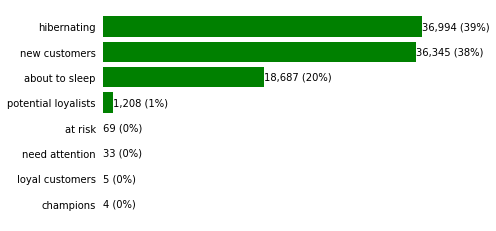

In [92]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='green')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Выводы по RFM-сегментации:

1. Основные группы покупателей - это покупатели, которые совершили 1-2 покупки давно (hibernating), новые покупатели, которые совершили 1 покупку недавно (new customers), и покупатели, которые совершили 1-2 покупки не так давно (about to sleep).
2. В целом, абсолютное большинство наших покупателей (97%) совершает только 1 покупку, видимо, наш товар либо необходим не так часто (не каждодневного спроса), либо сам товар не удовлетворяет покупателей (из-за этого после 1 покупки они не возвращаются к нам за последующими покупками).
3. Наша задача - исследовать, почему покупатели совершают в основном только 1 покупку, а также вернуть покупателей, которые  совершали покупку давно (например, с помощью акций, предоставления промокодов и тд).
